/var/folders/8k/k3bvjyw11bn71c86_td36h0m0000gn/T/ipykernel_33886/2825013303.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Analytics'] = extracted_data['Analytics'].str.extract('[pP]?([kK]+)')[0].apply(lambda x: 10**3 if x == 'k' else 1)


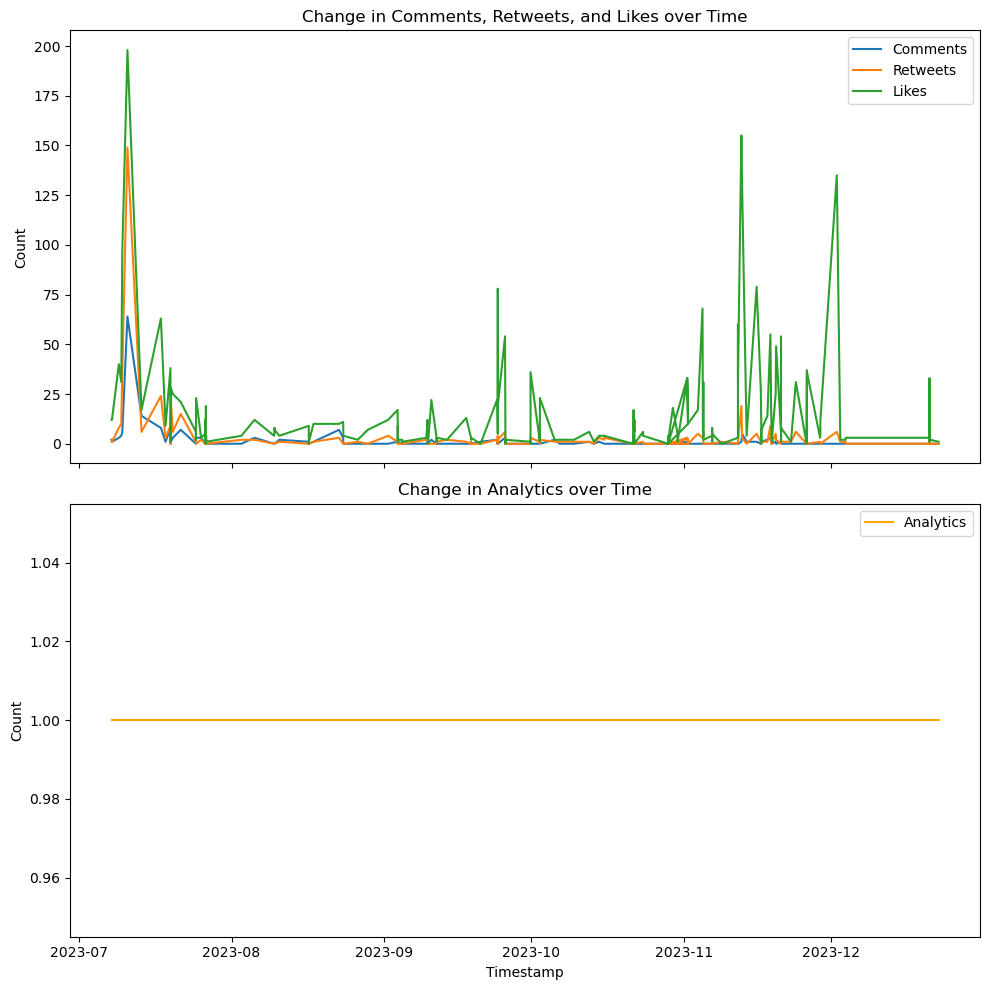

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the file path
file_path = 'tweets/Football&by-insidenu.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the specified columns
selected_columns = ['Timestamp', 'Comments', 'Retweets', 'Likes', 'Analytics']
extracted_data = df[selected_columns]

# Plot the change in comments, retweets, and likes over time
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Plot for Comments, Retweets, and Likes
ax1.plot(extracted_data['Timestamp'], extracted_data['Comments'], label='Comments')
ax1.plot(extracted_data['Timestamp'], extracted_data['Retweets'], label='Retweets')
ax1.plot(extracted_data['Timestamp'], extracted_data['Likes'], label='Likes')

# Set labels and title for the first plot
ax1.set_ylabel('Count')
ax1.set_title('Change in Comments, Retweets, and Likes over Time')
ax1.legend()

# Plot for Analytics
extracted_data['Analytics'] = extracted_data['Analytics'].str.extract('[pP]?([kK]+)')[0].apply(lambda x: 10**3 if x == 'k' else 1)
ax2.plot(extracted_data['Timestamp'], extracted_data['Analytics'], color='orange', label='Analytics')

# Set labels and title for the second plot
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Count')
ax2.set_title('Change in Analytics over Time')
ax2.legend()

# Format x-axis dates
ax1.xaxis_date()
ax2.xaxis_date()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()
